# Analysis of Vodafone users' fluxes

The study of the flux of people inside urban areas is of paramount importance to achieve an optimal understanding of emerging critical issues in the local mobility, and to explore areas of potential improvements in the infrastructures and local transports.

The mobility of users within and toward Padova has been monitored using the data provided by the Vodafone mobile carrier, which provides the information based on the users' connections to the network cells.
The data provided by the carrier encompasses the monitoring of the users connected to the Vodafone network in Padova in a four-month period from February to May of 2018.

To provide statistical insights on the number and the flow of users, the data is aggregated based on the origin and movements of the users by averaging the number of connections during the time of the monitoring.

To further avoid privacy violation issues, all observations with less than 30 units (e.g. day-areas for which $<$30 users have contributed) have been discarded and/or merged into dedicated categories (indicated with "altro", or "other").


## Datasets 

The data is provided in `.csv` files.

* __day_od.csv__: table of the origins and destinations of the users averaged by the day of the week. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).
* __distinct_users_day.csv__: table of the number of distinct users by origin. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).

The information is stored in the fields according to the following scheme: 

- __MONTH__: month analyzed
- __DOW__: day analyzed
- __ORIGIN__: users' origin area (do not consider this field)
- __DESTINATION__: users' destination area (do not consider this field)
- __CUST_CLASS__: user type (resident / Italian visitor / foreigner visitor)
- __COD_COUNTRY__: users' country code (e.g. 222=Italy)
- __COD_PRO__: users' province code (e.g. 12=Varese) 
- __PRO_COM__: users' comune code (e.g. 12026=Busto Arsizio)
- __FLOW__: number of movements for given date-time (with a minimum of 30 users)
- __VISITORS__: overall number of users 

Together with the data files, three lookup-tables are provided to allow matching the Italian institute of STATistics (ISTAT) country, province and comune codes to the actual names.

* __codici_istat_comune.csv__: lookup file containing the mapping between _comune_ ISTAT code-names
* __codici_istat_provincia.csv__: lookup file containing the mapping between _province_ ISTAT code-names
* __codici_nazioni.csv__: lookup file containing mapping the _country_ code to its name

Additional information, useful for the study of the flow of users, as the number of inhabitants of each province and the distance between Padova and all other Italian provinces can be extracted based on the data collected by the ISTAT:

   - English: https://www.istat.it/en/analysis-and-products/databases, Italian: https://www.istat.it/it/dati-analisi-e-prodotti/banche-dati
   
   - English/Italian: https://www.istat.it/en/archive/157423, Italian: https://www.istat.it/it/archivio/157423
   
   - `.zip` package containing the distances between comuni in Veneto region: http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip

If deemed useful, the open repository [https://github.com/openpolis/geojson-italy](https://github.com/openpolis/geojson-italy) contains a `.json` file with the geographical coordinates of the provinces and communi of Italy.


## Assignments

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.

   1.1 Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors
   
   1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.


2. Study of the visitors' fluxes: you are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways (from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste). Evaluate which of the three directions has to be prioritized.

   2.1 Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
   
   2.2 Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.


3. Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of function should be used to describe the distribution.

   3.1 Assuming an analytic form can be used to describe the trend, create a regression or a fit to estimate the expected number of visitors by the distance of the province of origin and the corresponding uncertainties. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

In [2]:
#importing the necessary modules
import numpy as np
import pandas as pd
import csv
import codecs
import re
from matplotlib import pyplot as plt

# Task 1 : Data Preparation 

## Task 1.1 : Data Extraction and Interpretation from .csv files

In [3]:
file_name1 = "codici_istat_comune.csv"
file_name2 = "codici_istat_provincia.csv"
file_name3 = "codici_nazioni.csv"
file_name4 = "day_od.csv"
file_name5 = "distinct_users_day.csv"

# Extracting data from the '.csv' files and removing the encoding
data_comune = pd.read_csv(file_name1, encoding='latin1')
data_provincia = pd.read_csv(file_name2, encoding='latin1')
data_day = pd.read_csv(file_name4, encoding='UTF-16BE')
data_users = pd.read_csv(file_name5, encoding='latin1')

# Extracting Data from the codici_nazioni.csv file, by removing the BOM.
table = pd.read_csv('codici_nazioni.csv', sep=',', encoding='unicode_escape')
regex = '([a-zA-Z0-9_-])' # You can add any other character you wish to keep
data_nazioni = table.rename(columns=dict((col, ''.join(re.findall(regex, col))) for col in table.columns))
 
print(data_comune)
print(data_provincia)
print(data_nazioni)
print(data_day)
print(data_users)

      COD_PRO  PRO_COM           COMUNE  COMUNE_CAPOLUOGO
0           1     1001            Agliè                 0
1           1     1002          Airasca                 0
2           1     1003     Ala di Stura                 0
3           1     1004  Albiano d'Ivrea                 0
4           1     1005  Alice Superiore                 0
...       ...      ...              ...               ...
7950      111   111104       Villasalto                 0
7951      111   111105      Villasimius                 0
7952      111   111106         Villasor                 0
7953      111   111107    Villaspeciosa                 0
7954     -999     -999            Altro                 0

[7955 rows x 4 columns]
     COD_REG  COD_PRO     PROVINCIA PROV_SIGLA
0          1        1        Torino         TO
1          1        2      Vercelli         VC
2          1        3        Novara         NO
3          1        4         Cuneo         CN
4          1        5          Asti         

## Task 1.2 : Ranking Visitors from Other Countries

In [4]:
#Creating DataFrames 
DF_users = pd.DataFrame(data_users).iloc[:12846]
DF_nazioni = pd.DataFrame(data_nazioni).iloc[:235]
DF_provincia = pd.DataFrame(data_provincia).iloc[:]
DF_comune = pd.DataFrame(data_comune).iloc[:]
DF_day = pd.DataFrame(data_day).iloc[:]

#Merging and Accessing group of rows based on the column values or labels 
Merged = pd.merge(DF_users, DF_nazioni, on="COD_COUNTRY") #on --> To join (in Database style) on this particular column 
Merged1 = pd.merge(DF_users, DF_provincia, on="COD_PRO")
show = Merged.loc[Merged['CUST_CLASS'] == 'foreigner'] # Accessing rows where the value of the column CUST_CLASS is 'foreigner'
show_it_visitors = Merged1.loc[Merged1['CUST_CLASS'] == 'visitor'] # Accessing rows where the value of the column CUST_CLASS is 'visitor'

cntry_cod = DF_nazioni.loc[:, "COD_COUNTRY"] # Extracting a single column of Country codes
pro_cod = DF_provincia.loc[:, "COD_PRO"] # Extracting a single column of Country codes
print(pro_cod)

a = show.sort_values(by="VISITORS", ascending=False) #Sorting the values by number of visitors (greatest to smallest)
b = show_it_visitors.sort_values(by="VISITORS", ascending=False) #Sorting the values by number of visitors (greatest to smallest)
print(a)

0        1
1        2
2        3
3        4
4        5
      ... 
103     91
104     92
105     95
106    111
107   -999
Name: COD_PRO, Length: 108, dtype: int64
             DOW CUST_CLASS  COD_COUNTRY  COD_PRO  PRO_COM  VISITORS  \
12357  Mercoledì  foreigner        208.0      NaN      NaN     20312   
12799   Domenica  foreigner        228.0      NaN      NaN     20264   
12360     Lunedì  foreigner        208.0      NaN      NaN     19696   
12798     Sabato  foreigner        228.0      NaN      NaN     18260   
12355    Giovedì  foreigner        208.0      NaN      NaN     18164   
...          ...        ...          ...      ...      ...       ...   
12739    Giovedì  foreigner        401.0      NaN      NaN        32   
12608    Giovedì  foreigner        295.0      NaN      NaN        32   
12606    Venerdì  foreigner        295.0      NaN      NaN        32   
12702     Lunedì  foreigner        419.0      NaN      NaN        32   
12662    Giovedì  foreigner        605.0      

In [42]:
foreign_visitors = pd.DataFrame(columns=['COUNTRY_CODE', 'COUNTRY', 'TOTAL_VISITORS',]) #Creating a new DataFrame
visitors = 0 # initialising values
x=0
for x in cntry_cod.index:    
    visitors = 0
    for y in a.index:
        if cntry_cod[x] == a['COD_COUNTRY'][y]: #sorting through and adding the total number of visitors for each country
            p = a['COD_COUNTRY'][y]
            #print(p)
            visitors = visitors + a['VISITORS'][y]  
            name = a.query("COD_COUNTRY== @p")["COUNTRY_NAME_IT"].unique() #storing the name of the country to add in dataframe later
            #print(name)            
        else: 
            continue # Moving on to the next iteration
      
    row = {'COUNTRY_CODE':cntry_cod[x], 'TOTAL_VISITORS': visitors, 'COUNTRY': name}#adding values in the dataframe row by row
    new_df = pd.DataFrame([row])
    foreign_visitors = pd.concat([foreign_visitors, new_df], axis=0, ignore_index=True)
    Foreign_visitors = foreign_visitors.sort_values(by="TOTAL_VISITORS", ascending=False).iloc[:20] #Sorting values (Descending) 
print(Foreign_visitors)

    COUNTRY_CODE                  COUNTRY TOTAL_VISITORS
171          208                [Francia]         129672
174          228               [Svizzera]         116884
55           262               [Germania]         109176
40           460                   [Cina]         107796
25           232                [Austria]          96776
172          214                 [Spagna]          71872
116          204            [Paesi Bassi]          70432
206          310  [Stati Uniti d'America]          64160
2            226                [Romania]          59012
113          234          [Gran Bretagna]          46180
5            250                 [Russia]          42424
79           216               [Ungheria]          30344
1            219                [Croazia]          26504
123          293               [Slovenia]          25760
170          206                 [Belgio]          25380
29           284               [Bulgaria]          21472
147          260               

## Task 1.2 : Ranking Italian Visitors from Other Provinces 

In [37]:
#Creating a new DataFrame
italian_visitors = pd.DataFrame(columns=['PRO_CODE','TOTAL_VISITORS','PROVINCE_NAME']) 

#initialising the values of the variables 
it_visitors = 0
x=0
#Sorting through the DataFrame 'b' to determine the countries with maximum number of visitors 
for x in pro_cod.index:    
    it_visitors = 0
    for y in b.index:
        if pro_cod[x] == b['COD_PRO'][y]: #sorting through and adding the total number of visitors for a particular comune
            p1 = b['COD_PRO'][y]
            it_visitors = it_visitors + b['VISITORS'][y]  
            name = Merged1.query("COD_PRO== @p1")["PROVINCIA"].unique()
        else: 
            continue # Moving on to the next iteration
            
    # Adding the details of the top 20 Comune of Italy that contibute to the highest number of visitors in Padova  
    row1 = {'PRO_CODE':pro_cod[x], 'TOTAL_VISITORS': it_visitors, 'PROVINCE_NAME': name}#adding values in the dataframe row by row    
    new_df = pd.DataFrame([row1])
    italian_visitors = pd.concat([italian_visitors, new_df], axis=0, ignore_index=True)
    Italian_visitors = italian_visitors.sort_values(by="TOTAL_VISITORS", ascending=False).iloc[:21]    
print(Italian_visitors)

   PRO_CODE TOTAL_VISITORS            PROVINCE_NAME
28       28        1932696                 [Padova]
27       27         620236                [Venezia]
24       24         431952                [Vicenza]
26       26         317224                [Treviso]
23       23         181604                 [Verona]
12       15         177380                 [Milano]
29       29         163464                 [Rovigo]
66       58          95056                   [Roma]
42       37          72980                [Bologna]
22       22          65148                 [Trento]
43       38          53832                [Ferrara]
30       30          47784                  [Udine]
25       25          46992                [Belluno]
0         1          39068                 [Torino]
33       93          38272              [Pordenone]
14       17          34416                [Brescia]
41       36          30928                 [Modena]
20      108          30648  [Monza e della Brianza]
17       20 

# Task 2 : Study of Visitor Fluxes

## Task 2.0 : Preparation of data for Finding the flux
To understand the flux, we will have to define a radius in which we will find all the provinces and cities from which users visit Padova

In [5]:
#Creating Dataframes of the extracted data
DF_users = pd.DataFrame(data_users).iloc[:12846]
DF_provincia = pd.DataFrame(data_provincia).iloc[:]

#Merging DataFrames 
Merged2 = pd.merge(DF_users, DF_provincia, on="COD_PRO")
show_pd_visitors = Merged2.loc[Merged2['CUST_CLASS'] == 'visitor']

#extracting a column from the dataframe for iterating using for loops
reg_cod = DF_provincia.loc[:, "COD_REG"].iloc[:].unique()
print(reg_cod) 

c = show_pd_visitors.sort_values(by="VISITORS", ascending=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20 -999]


In [6]:
reg_code = {'COD_REG': [3, 4, 5, 6, 8], 'REGION_NAME': ['LOMBARDY', 'TRENTINO-ALTO ADIGE', 'VENETO', 'FRUILI-VENEZIA-GUILIA', 'EMILIA-ROMAGNA']}
regional_cod = pd.DataFrame(data=reg_code).iloc[:]

## Task 2.1 : Finding The Flux From Nearby Regions (Mid-Range)
Here, we are focusing on the bordering Regions of Padova(Veneto). The flux is studied for 5 regions including Veneto. 
These are, Lombardy, Emilia-Romagna, Trentino-Alto Adige, and Fruili-Venezia-Guilia.

In [7]:
#Creating a new DataFrame
padova_visitors = pd.DataFrame(columns=['COD_REG', 'TOTAL_VISITORS']) 

#Initialising Values 
pd_visitors = 0 
x=0

#Sorting through the DataFrame 'c' to determine the countries with maximum number of visitors 
for x in reg_cod: 
    pd_visitors = 0
    for y in c.index:
        if (x == c['COD_REG'][y]) and (c['COD_REG'][y] in (3,4,5,6,8)): #sorting through and adding the total number of visitors for a particular Regione
            p1 = b['COD_PRO'][y]         
            p1 = c['COD_REG'][y] 
            a=p1
            #print(a)
            pd_visitors = pd_visitors + c['VISITORS'][y]  
            #print(Merged2.query("COD_PRO == @p2")["PROVINCIA"].unique())  
            reg_code = p1
        else: 
            continue
    # Adding the details of the 5 regions of Italy that contibute to the highest number of visitors in Padova  
    row1 = {'COD_REG':reg_code , 'TOTAL_VISITORS': pd_visitors}    
    new_df = pd.DataFrame([row1])
    padova_visitors = pd.concat([padova_visitors, new_df], axis=0, ignore_index=True) #Adding values to the dataFrame row by row
    Padova_visitors = padova_visitors.sort_values(by="TOTAL_VISITORS", ascending=False).iloc[:5]  
Padova_visitors = pd.merge(regional_cod, Padova_visitors, on="COD_REG").sort_values(by="TOTAL_VISITORS", ascending=False)
print(Padova_visitors)

  COD_REG            REGION_NAME TOTAL_VISITORS
2       5                 VENETO        3694168
0       3               LOMBARDY         360480
4       8         EMILIA-ROMAGNA         233648
3       6  FRUILI-VENEZIA-GUILIA         111564
1       4    TRENTINO-ALTO ADIGE          93184


## Task 2.2 : Finding The Flux From The Provinces in The Given Three Directions 
### Data preparation

In [15]:
file_name6 = "R05_PD.csv"

#Extracting Data for Distance between Padova and others Provinces and Comune 
table = pd.read_csv('R05_PD.csv', sep=';', encoding='unicode_escape')
regex = '([a-zA-Z0-9_-])' # You can add any other character you wish to keep
data_PD = table.rename(columns=dict((col, ''.join(re.findall(regex, col))) for col in table.columns))
DF_pd = pd.DataFrame(data_PD).iloc[:]


#28060 is the Comune Code of Padova. So essentially, we are trying to get the distance of other regions to Padova using it.
data_PD = DF_pd.loc[DF_pd['OR_PROCOM'] == 28060].replace(',', '.', regex=True).iloc[:] 
data_PD["KM_TOT"] = pd.to_numeric(data_PD["KM_TOT"], downcast="float")
#print(data_PD.dtypes) 
data_PD = data_PD.sort_values(by="KM_TOT", ascending=True).iloc[:]
#data_PD.to_csv('R05_PD_extracted.csv', index=False)
print(data_PD)

              OR_DEST  OR_REG  OR_PROV  OR_PROCOM  DEST_REG  DEST_PROV  \
442344  28060 - 28060       5       28      28060         5         28   
442346  28060 - 28072       5       28      28060         5         28   
442356  28060 - 28058       5       28      28060         5         28   
442364  28060 - 28054       5       28      28060         5         28   
442351  28060 - 28045       5       28      28060         5         28   
...               ...     ...      ...        ...       ...        ...   
450599  28060 - 81009       5       28      28060        19         81   
450590  28060 - 81012       5       28      28060        19         81   
450594  28060 - 81024       5       28      28060        19         81   
450601  28060 - 81014       5       28      28060        19         81   
450602  28060 - 84020       5       28      28060        19         84   

        DEST_PROCOM  TEP_TOT       KM_TOT  TTP_TOT  
442344        28060        0     0.000000        0  
44234

### Finding Provinces in the Three Directions Using GeoJSON files (given above for reference).
This data was found using this file and Wikipedia (for confirmation).

#### Provinces along A4 (North-East) Autostrada are: Venice, Treviso, Udine, Gorizia, Trieste
#### Provinces along A13(South) Autostrada are: Rovigo, Ferrara, Bologna
#### Provinces along A4 (West) Autostrada are: Torino, Vercelli, Novara, Milano, Bergamo, Brescia, Verona, Vicenza, Monza-Brianza


To find the flux on Weekdays and Weekends, we should separate the days of the week from the Dataframe 'b'

In [16]:
#Preparing Data for raising queries and saving the results
weekday = ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì"]
weekend = ["Sabato", "Domenica"]

#trying a new method to extract the useful data for finding the Visitor Flux of Padova by querying 
b_weekdays = (b.query('DOW == ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì"]'))
b_weekends = b.query('DOW == ["Sabato", "Domenica"]')

#Query for other useful data 
weekend_flux_a4NE = b_weekends.query('PROVINCIA == ["Venezia", "Treviso", "Udine", "Gorizia", "Trieste"]')
weekday_flux_a4NE = b_weekdays.query('PROVINCIA == ["Venezia", "Treviso", "Udine", "Gorizia", "Trieste"]')
weekend_flux_a13S = b_weekends.query('PROVINCIA == ["Rovigo", "Ferrara", "Bologna"]')
weekday_flux_a13S = b_weekdays.query('PROVINCIA == ["Rovigo", "Ferrara", "Bologna"]')
weekend_flux_a4We = b_weekends.query('PROVINCIA == ["Torino", "Vercelli", "Novara", "Milano", "Bergamo", "Brescia", "Verona", "Vicenza", "Monza e della Brianza"]')
weekday_flux_a4We = b_weekdays.query('PROVINCIA == ["Torino", "Vercelli", "Novara", "Milano", "Bergamo", "Brescia", "Verona", "Vicenza", "Monza e della Brianza"]')

#Seeing the result of queries
print(weekday_flux_a4NE)
print(weekend_flux_a4NE)
#print(b_weekdays)
#print(b_weekends)

             DOW CUST_CLASS  COD_COUNTRY  COD_PRO  PRO_COM  VISITORS  COD_REG  \
1531     Venerdì    visitor        222.0     27.0  27042.0     20608        5   
1297   Mercoledì    visitor        222.0     27.0  27042.0     20572        5   
1433     Giovedì    visitor        222.0     27.0  27042.0     19368        5   
1338     Martedì    visitor        222.0     27.0  27042.0     19236        5   
1460      Lunedì    visitor        222.0     27.0  27042.0     18644        5   
...          ...        ...          ...      ...      ...       ...      ...   
8913     Martedì    visitor        222.0     30.0  30056.0        32        6   
8907      Lunedì    visitor        222.0     30.0  30133.0        32        6   
3324     Venerdì    visitor        222.0     26.0  26018.0        32        5   
10254     Lunedì    visitor        222.0     32.0  32003.0        32        6   
1452     Venerdì    visitor        222.0     27.0  27030.0        32        5   

      PROVINCIA PROV_SIGLA 

In [17]:
#Creating a new DataFrame
padova_visitors1 = pd.DataFrame(columns=['HIGHWAY', 'TOTAL_VISITORS','DAY_TYPE'])

### Calculating the total number of Visitor Flux through Different highways and adding these values to the above Dataframe.

In [18]:
pd_WE_visitors = 0
for x in weekend_flux_a4NE.index :
    pd_WE_visitors = pd_WE_visitors + weekend_flux_a4NE['VISITORS'][x] 
    
pd_WE_visitors_a4NE = pd_WE_visitors    
row1 = {'HIGHWAY': "A4 Venezia-Trieste" , 'TOTAL_VISITORS': pd_WE_visitors_a4NE,'DAY_TYPE':"WEEKEND" }
new_df = pd.DataFrame([row1])
padova_visitors1 = pd.concat([padova_visitors1, new_df], axis=0, ignore_index=True)

print("Total Number of Weekend Visitors through A4 Venezia-Trieste Highway = ",  pd_WE_visitors_a4NE)

Total Number of Weekend Visitors through A4 Venezia-Trieste Highway =  298896


In [19]:
pd_WD_visitors = 0
for x in weekday_flux_a4NE.index :
    pd_WD_visitors = pd_WD_visitors + weekday_flux_a4NE['VISITORS'][x] 
    
pd_WD_visitors_a4NE = pd_WD_visitors    
row1 = {'HIGHWAY': "A4 Venezia-Trieste" , 'TOTAL_VISITORS': pd_WD_visitors_a4NE, 'DAY_TYPE':"WEEKDAY"}
new_df = pd.DataFrame([row1])
padova_visitors1 = pd.concat([padova_visitors1, new_df], axis=0, ignore_index=True)
print("Total Number of Weekday Visitors through A4 Venezia-Trieste Highway = ",  pd_WD_visitors_a4NE)

Total Number of Weekday Visitors through A4 Venezia-Trieste Highway =  711856


In [20]:
pd_WE_visitors = 0
for x in weekend_flux_a13S.index :
    pd_WE_visitors = pd_WE_visitors + weekend_flux_a13S['VISITORS'][x] 
    
pd_WE_visitors_a13S =  pd_WE_visitors
row1 = {'HIGHWAY': "A13 Bologna-Padova" , 'TOTAL_VISITORS': pd_WE_visitors_a13S,'DAY_TYPE':"WEEKEND" }
new_df = pd.DataFrame([row1])
padova_visitors1 = pd.concat([padova_visitors1, new_df], axis=0, ignore_index=True)
print("Total Number of Weekday Visitors through A13 Bologna-Padova Highway = ",  pd_WE_visitors_a13S)

Total Number of Weekday Visitors through A13 Bologna-Padova Highway =  100960


In [21]:
pd_WD_visitors = 0
for x in weekday_flux_a13S.index :
    pd_WD_visitors = pd_WD_visitors + weekday_flux_a13S['VISITORS'][x] 
    
pd_WD_visitors_a13S =  pd_WD_visitors 
row1 = {'HIGHWAY': "A13 Bologna-Padova", 'TOTAL_VISITORS': pd_WD_visitors_a13S, 'DAY_TYPE':"WEEKDAY" }
new_df = pd.DataFrame([row1])
padova_visitors1 = pd.concat([padova_visitors1, new_df], axis=0, ignore_index=True)
print("Total Number of Weekday Visitors through A13 Bologna-Padova Highway = ",  pd_WD_visitors_a13S)

Total Number of Weekday Visitors through A13 Bologna-Padova Highway =  189316


In [22]:
pd_WE_visitors = 0
for x in weekend_flux_a4We.index :
    pd_WE_visitors = pd_WE_visitors + weekend_flux_a4We['VISITORS'][x] 
    
pd_WE_visitors_a4We = pd_WE_visitors  
row1 = {'HIGHWAY': "A4 Milano-Torino", 'TOTAL_VISITORS': pd_WE_visitors_a4We,'DAY_TYPE':"WEEKEND" }
new_df = pd.DataFrame([row1])
padova_visitors1 = pd.concat([padova_visitors1, new_df], axis=0, ignore_index=True)
print("Total Number of Weekday Visitors through A4 Milano-Torino Highway = ",  pd_WE_visitors_a4We)

Total Number of Weekday Visitors through A4 Milano-Torino Highway =  287152


In [23]:
pd_WD_visitors = 0
for x in weekday_flux_a4We.index :
    pd_WD_visitors = pd_WD_visitors + weekday_flux_a4We['VISITORS'][x] 
pd_WD_visitors_a4We = pd_WD_visitors
row1 = {'HIGHWAY': "A4 Milano-Torino", 'TOTAL_VISITORS': pd_WD_visitors_a4We, 'DAY_TYPE':"WEEKDAY" }
new_df = pd.DataFrame([row1])
padova_visitors1 = pd.concat([padova_visitors1, new_df], axis=0, ignore_index=True)
print("Total Number of Weekday Visitors through A4 Milano-Torino Highway = ",  pd_WD_visitors_a4We)

Total Number of Weekday Visitors through A4 Milano-Torino Highway =  644384


In [24]:
Padova_visitors1 = padova_visitors1.sort_values(by="TOTAL_VISITORS", ascending=False).iloc[:6]  
print(Padova_visitors1)#DataFrame with results for Weekday and Weekend Flux

              HIGHWAY TOTAL_VISITORS DAY_TYPE
1  A4 Venezia-Trieste         711856  WEEKDAY
5    A4 Milano-Torino         644384  WEEKDAY
0  A4 Venezia-Trieste         298896  WEEKEND
4    A4 Milano-Torino         287152  WEEKEND
3  A13 Bologna-Padova         189316  WEEKDAY
2  A13 Bologna-Padova         100960  WEEKEND


### Conclusion : The Highway that should be prioritised is A4 (NE) Venezia-Trieste 
The A4 (NE) Venezia-Trieste, pulls the most crowds to and from Padova on Weekday and Weekends. 

# Task 3 


## Task 3.1:  Plot of Visitors v/s Distance of the Provinces of Origin
To plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of function should be used to describe the distribution.



In [25]:
#Extracting Useful Data to be able to plot it 
Padova_visitors = pd.merge(DF_comune, b, on= ["COD_PRO","PRO_COM"])
PD_visitors = pd.merge(Padova_visitors, data_PD,  left_on='PRO_COM', right_on='DEST_PROCOM')
provincia = PD_visitors.loc[PD_visitors['COMUNE_CAPOLUOGO'] == 1]
provincia.drop(['COD_COUNTRY','OR_PROV','OR_PROCOM','OR_REG','CUST_CLASS', 'DEST_REG', 'COMUNE_CAPOLUOGO'], axis=1, inplace=True)
provincia = provincia.loc[provincia['DOW'] =="Sabato"].sort_values(by="KM_TOT", ascending=True).iloc[:]

#provincia['logarithm_base2'] = np.log2(provincia["VISITORS"])

print(provincia)

       COD_PRO  PRO_COM         COMUNE     DOW  VISITORS  COD_REG  \
4898        24    24116        Vicenza  Sabato     14384        5   
6953        29    29041         Rovigo  Sabato      9972        5   
6064        27    27042        Venezia  Sabato     21840        5   
5713        26    26086        Treviso  Sabato      6112        5   
8670        38    38008        Ferrara  Sabato      4824        8   
...        ...      ...            ...     ...       ...      ...   
11810       88    88009         Ragusa  Sabato        48       19   
11661       85    85004  Caltanissetta  Sabato        56       19   
11617       82    82053        Palermo  Sabato       524       19   
11649       84    84001      Agrigento  Sabato        60       19   
11605       81    81021        Trapani  Sabato        68       19   

           PROVINCIA PROV_SIGLA        OR_DEST  DEST_PROV  DEST_PROCOM  \
4898         Vicenza         VI  28060 - 24116         24        24116   
6953          Rovigo   

C:\Users\Mahe\AppData\Local\Temp\ipykernel_5292\1708526259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia.drop(['COD_COUNTRY','OR_PROV','OR_PROCOM','OR_REG','CUST_CLASS', 'DEST_REG', 'COMUNE_CAPOLUOGO'], axis=1, inplace=True)


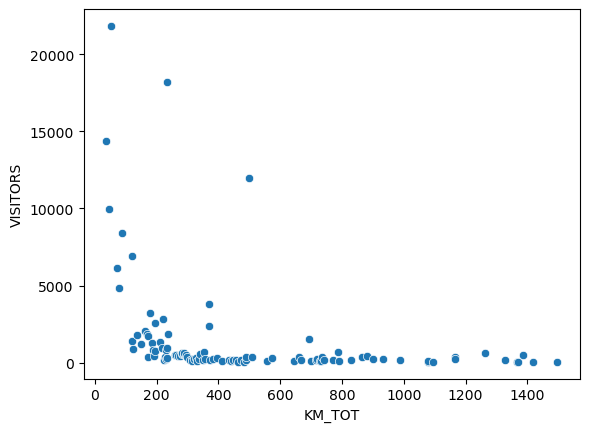

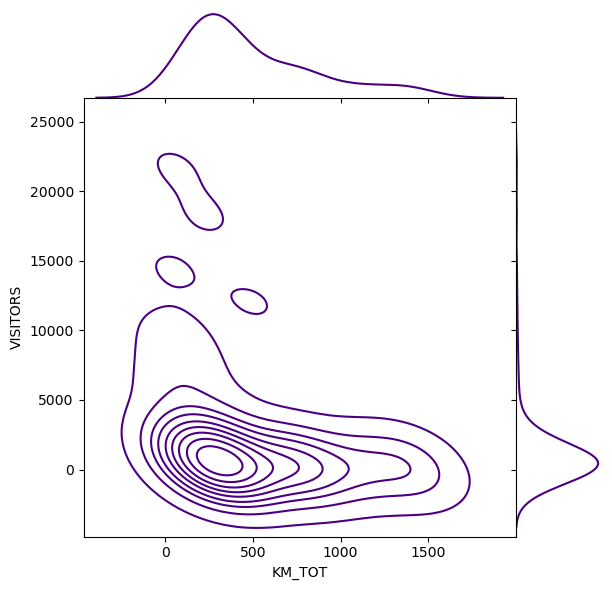

In [26]:
import seaborn as sns

#Scatter-Plot
sns.scatterplot(x = "KM_TOT", y="VISITORS", data=provincia)

#Joint Plot
sns.jointplot(data=provincia, x = "KM_TOT", y="VISITORS", kind="kde", space=0, color="indigo")

4898       37.099998
6953       46.200001
6064       51.700001
5713       71.099998
8670       78.300003
            ...     
11810    1365.599976
11661    1369.099976
11617    1387.199951
11649    1418.400024
11605    1496.199951
Name: KM_TOT, Length: 104, dtype: float32 

4898     13.812177
6953     13.283667
6064     14.414685
5713     12.577429
8670     12.236014
           ...    
11810     5.584963
11661     5.807355
11617     9.033423
11649     5.906891
11605     6.087463
Name: VISITORS, Length: 104, dtype: float64


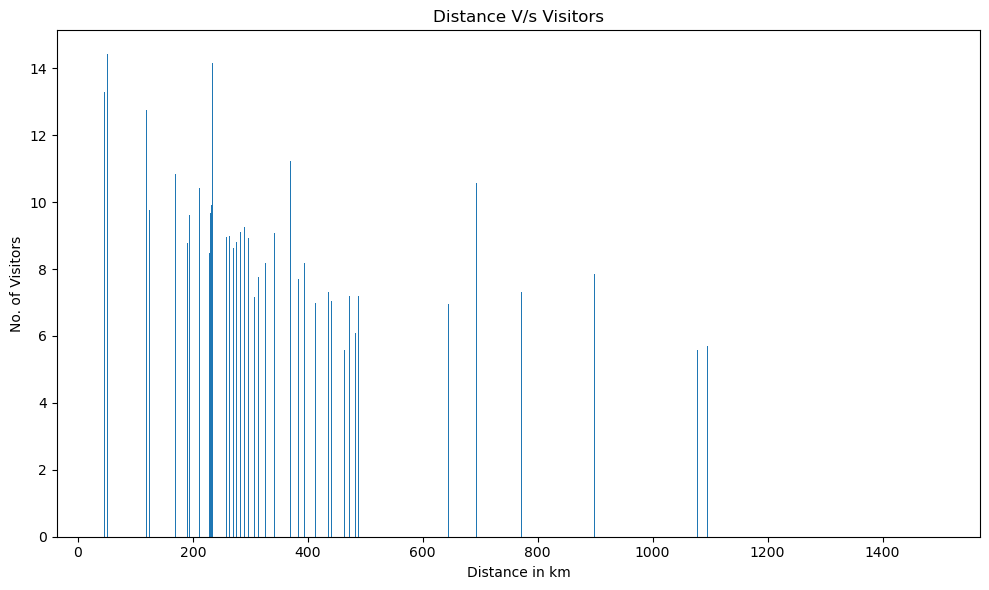

In [27]:
x = provincia["KM_TOT"]
y = np.log2(provincia["VISITORS"])
print(x,'\n')
print(y)
#Normal Plot of x and y
fig = plt.figure(figsize=(10, 6)) # create the figure and the axes
plt.bar(x, y, align = 'center')
ax = fig.axes[0]
ax.set_title('Distance V/s Visitors')
ax.set_xlabel('Distance in km')
ax.set_ylabel('No. of Visitors')
fig.tight_layout()


## Task 3.2 : Regression for No. of Visitors and Distances of the Province
Assuming an analytic form can be used to describe the trend, create a regression or a fit to estimate the expected number of visitors by the distance of the province of origin and the corresponding uncertainties. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

##### Assuming an analytic form: 
Making a guess or prediction using a mathematical formula. So, I decided to use the Exponential Distribution Equation. 

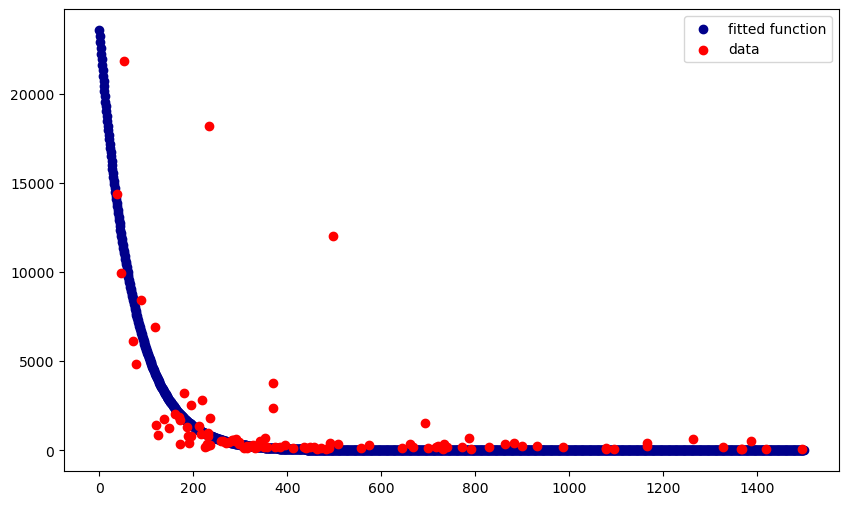

In [28]:
# generate data according to a certain distribution + random noise
x = np.linspace(0, 1500, 1500)
lam = 1/70
y = 1650000*lam*(np.exp(-lam*x))

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=x, y=y, marker='o', c='darkblue', label='fitted function')

x_data = (provincia['KM_TOT'])
y_data = (provincia['VISITORS'])

# plot
plt.scatter(x_data, y_data, color='red', label="data")
plt.legend(loc='best')



##### To create a regression or a fit: TRIAL 1


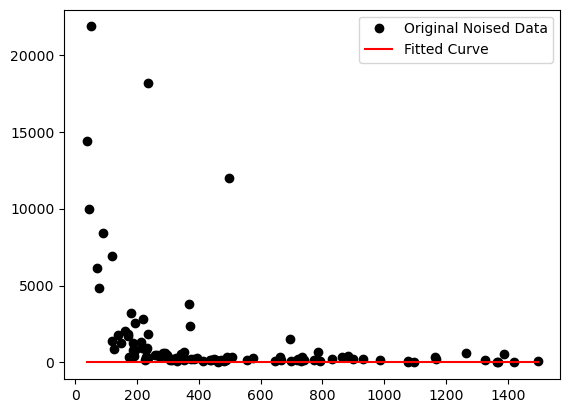

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c 

x = provincia['KM_TOT']
y_est = np.array(func(x, 23571, 0.01428571428, 0.5))
yn = provincia['VISITORS']

x_data = provincia['KM_TOT']
yn_data = provincia['VISITORS']

popt, pcov = curve_fit(func, x, yn)

plt.figure()
plt.plot(x_data, yn_data, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

##### TRIAL 2

a = 1.0 , b = 1.0, c = 1.0


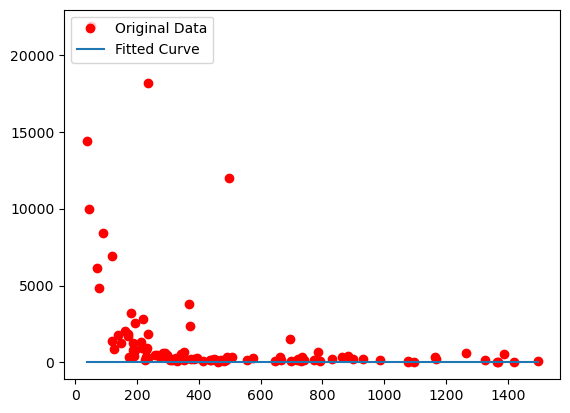

In [42]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym

"""
Generate some data, let's imagine that you already have this. 
"""

x = provincia['KM_TOT']
y = provincia['VISITORS']

"""
Plot your data
"""
plt.plot(x_data, y_data, 'ro',label="Original Data")

"""
brutal force to avoid errors
"""    

"""
create a function to fit with your data. a, b, c and d are the coefficients
that curve_fit will calculate for you. 
In this part you need to guess and/or use mathematical knowledge to find
a function that resembles your data
"""
def func(x, a, b, c):
     
    return (a * np.exp(-b * x)) + c

"""
make the curve_fit
"""
popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""
print ("a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2]))


plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()

##### TRIAL 3

[1. 1. 1.] [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


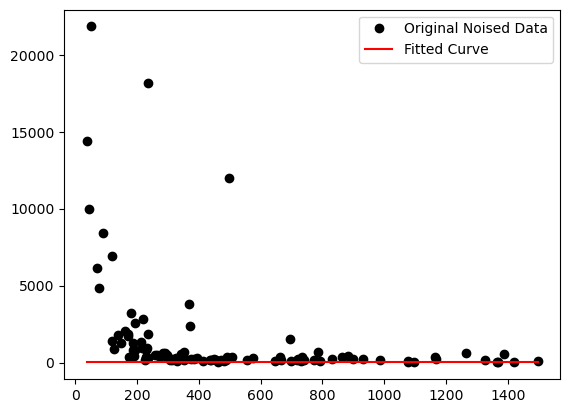

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*(np.exp(-b * x**-3)) + c

x_data = provincia['KM_TOT']
y_data = provincia['VISITORS']


x = provincia['KM_TOT']   # changed boundary conditions to avoid division by 0
y = func(x, 100000, 1000000, 0.5)
yerr = 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn, sigma = yerr, maxfev = 2000)
print(popt, pcov)

plt.figure()
plt.plot(x_data, y_data, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

##### FINAL TRIAL 

value of K1 =  146899018.6340925
value of K2 =  30690.27569585856
value of beta =  -2.2090297863747534


C:\Users\Mahe\AppData\Local\Temp\ipykernel_5292\1418474966.py:13: RuntimeWarning: overflow encountered in exp
  return K1 * t**beta * np.exp(-K2 * t**-3)


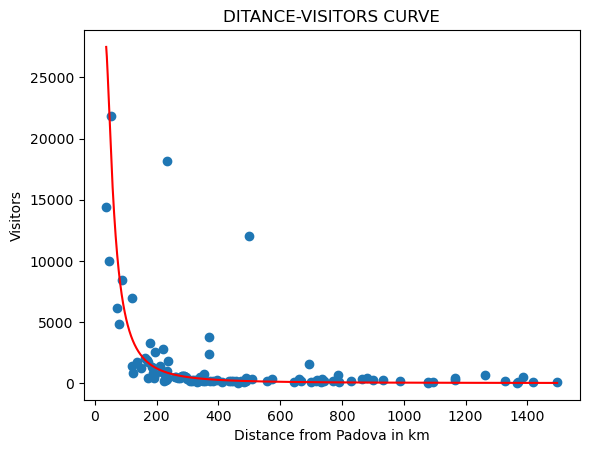

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

random.seed(123)
t = np.array(provincia['KM_TOT'])
y = np.array(provincia['VISITORS'])
yerr = 0.2*np.random.normal(size=len(x))


def F(t, K1, K2, beta):
        return K1 * t**beta * np.exp(-K2 * t**-3)


fig, ax1 = plt.subplots()
popt, pcov = curve_fit(F, t, y, sigma=yerr, maxfev=2000)


K1, K2, beta = popt
print("value of K1 = ",K1)
print("value of K2 = ",K2)
print("value of beta = ",beta)

ax1.plot(t, y, "o")
teval = np.linspace(t.min(), t.max(), 2100)
yeval = F(teval,*popt)
ax1.plot(teval, yeval, color='red')

ax1.set_xlabel('Distance from Padova in km')
ax1.set_ylabel('Visitors')
ax1.set(title='DITANCE-VISITORS CURVE')
plt.show()